# Практическая работа №6. Формирование электронных таблиц. Многопоточная и многопроцессорная оптимизация. Работа с генераторами

# Теоретическая часть

## 1. Генераторы в Python

**Генератор данных** - это специальный вид функции в Python, который позволяет создавать последовательность значений по мере необходимости. Вместо того чтобы сразу генерировать и хранить все значения, генератор создает их по одному по требованию.


1. **Создание генератора:**
    - Генератор создается с использованием ключевого слова `yield` внутри функции.
    - Вместо `return`, генератор использует `yield` для возврата значения и приостановки выполнения функции.
    - Пример:
        ```python
        def my_generator():
            yield 1
            yield 2
            yield 3

        gen = my_generator()
        ```

2. **Ленивая загрузка:**
    - Генераторы работают с ленивой загрузкой (lazy evaluation).
    - Они не создают все значения сразу, а только по мере запроса.
    - Это полезно для обработки больших объемов данных, когда нельзя или не нужно хранить все значения в памяти.

3. **Итерация по генератору:**
    - Генераторы можно использовать в циклах `for`.
    - Каждый вызов `yield` возвращает следующее значение из генератора.
    - Пример:
        ```python
        for value in gen:
            print(value)
        ```

4. **Состояние генератора:**
    - Генераторы сохраняют свое состояние между вызовами.
    - После каждого `yield` выполнение функции приостанавливается, а состояние сохраняется.
    - При следующем вызове генератор продолжает выполнение с того места, где остановился.

5. **Применение генераторов:**
    - Генераторы полезны для обработки больших файлов, потоковых данных, бесконечных последовательностей и других сценариев, где требуется эффективная загрузка данных.

### 1.1. **Функция `next()`**

1. **Функция `next()`**:
    - `next()` - это встроенная функция Python, которая используется для получения следующего значения из итератора (включая генераторы).
    - Когда вызывается `next()`, итератор продвигается к следующему элементу и возвращает его.
    - Если больше элементов нет, вызывается исключение `StopIteration`.

2. **Использование в генераторах**:
    - В примерах, которые я предоставил ранее, мы использовали `next()` для получения следующей порции данных из генератора.
    - В генераторах `next()` используется для получения следующего значения, которое было создано с помощью `yield`.
    - Пример:
        ```python
        def my_generator():
            yield 1
            yield 2
            yield 3

        gen = my_generator()

        print(next(gen))  # Выведет 1
        print(next(gen))  # Выведет 2
        print(next(gen))  # Выведет 3
        ```

3. **Обработка исключения `StopIteration`**:
    - Если больше элементов нет, вызывается исключение `StopIteration`.
    - Поэтому важно использовать `next()` внутри блока `try`/`except` для обработки этого исключения.

В общем, `next()` -  позволяет нам получать значения по мере необходимости, что особенно полезно при обработке больших объемов данных.

### 1.2. Примеры генераторов:



1. **Генератор случайных чисел:**
    - Этот генератор возвращает случайные числа в заданном диапазоне.

In [6]:
import random

def random_numbers(n, min_val, max_val):
    for _ in range(n):
        yield random.randint(min_val, max_val)

In [7]:
# Пример использования

gen = random_numbers(5, 1, 10)

for num in gen:
    print(num)

5
6
7
8
7


In [8]:
gen = random_numbers(5, 1, 10)

In [9]:
next(gen)

6

2. **Генератор бесконечной последовательности чисел:**
    - Этот формирует создает бесконечную последовательность чисел, начиная с заданного значения.


In [10]:
def infinite_sequence(start=0):
    while True:
        yield start
        start += 1

In [11]:
# Пример использования
numbers = infinite_sequence(10)
for _ in range(5):
    print(next(numbers))

10
11
12
13
14


In [12]:
next(numbers)

15


3. **Генератор факториалов:**
    - Этот генератор создает последовательность факториалов чисел.


In [13]:
def factorial():
    result = 1
    n = 1
    while True:
        yield result
        n += 1
        result *= n

In [14]:
# Пример использования
fact_gen = factorial()
for _ in range(6):
    print(next(fact_gen))

1
2
6
24
120
720


4. **Генератор строк из файла:**
    - Этот генератор читает строки из текстового файла по одной.


In [15]:
def generate_text_file(file_path="my_text_file.txt", num_lines=15):
    with open(file_path, 'w') as file:
        for i in range(1, num_lines + 1):
            file.write(f"This is line {i}\n")
generate_text_file()

def read_lines(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            yield line.strip()

In [16]:
# Пример использования
file_path = "my_text_file.txt"

gen = read_lines(file_path)

for line in gen:
    print(line)

This is line 1
This is line 2
This is line 3
This is line 4
This is line 5
This is line 6
This is line 7
This is line 8
This is line 9
This is line 10
This is line 11
This is line 12
This is line 13
This is line 14
This is line 15


In [17]:
gen = read_lines(file_path)

In [18]:
next(gen)

'This is line 1'

## 2. Оптимизация вычислений

Оптимизация программного обеспечения является важной частью разработки программного обеспечения. Она включает в себя ряд техник и подходов, направленных на улучшение производительности и эффективности программы. Одним из способов достижения этого является использование параллелизма, который может быть реализован с помощью процессов или потоков.


- **Процесс** - это программа, которая выполняется на вашем компьютере. Каждый процесс имеет свое собственное виртуальное пространство памяти и работает независимо от других процессов. Процессы могут взаимодействовать друг с другом через системные вызовы.

- **Поток**, с другой стороны, является частью процесса. Потоки в одном процессе могут делиться некоторыми ресурсами, такими как память, что делает их более легкими и быстрее в создании и переключении, чем процессы. Потоки в одном процессе могут работать параллельно, что позволяет более эффективно использовать многоядерные процессоры.



Можно сказать, что процесс - это как программа, выполняющаяся на вашем компьютере, а поток - это задача, которую выполняет этот процесс. Если у вас есть несколько потоков в одном процессе, они могут выполнять задачи параллельно.

В зависимости от конкретных требований и ограничений вашего приложения, вы можете выбрать использовать либо процессы, либо потоки для оптимизации вашей программы. Оба подхода имеют свои преимущества и недостатки, и выбор между ними будет зависеть от специфики вашей задачи.

### 2.1. Модули для управления процессами и потоками в Python

- **Multiprocessing** в Python - это модуль, который позволяет создавать процессы, используя API. Он обеспечивает как локальную, так и удаленную параллельность, эффективно обходя глобальную блокировку интерпретатора за счет использования подпроцессов вместо потоков. Это позволяет полностью использовать несколько ядер (процессоров) на данной машине. Он работает как на POSIX, так и на Windows.

- **ThreadPoolExecutor** в Python - это класс, который предоставляет возможность создания и использования пула потоков для эффективного выполнения задач параллельно. Этот класс является частью стандартной библиотеки Python и предлагает легко используемые пулы рабочих потоков посредством современного шаблона исполнителя. Он идеален для выполнения циклов задач ввода-вывода параллельно и для выдачи задач асинхронно.

> В обоих случаях, `multiprocessing` и `ThreadPoolExecutor` предоставляют удобные и эффективные способы для параллельного выполнения задач в Python. Они оба являются мощными инструментами, которые могут значительно улучшить производительность и эффективность ваших программ на Python. Однако выбор между ними зависит от конкретных требований и ограничений вашего приложения. В некоторых случаях может быть предпочтительнее использовать `multiprocessing`, в то время как в других случаях лучше использовать `ThreadPoolExecutor`.

#### *Таблица №1. Сравнительная таблица Multiprocessing и ThreadPoolExecutor*

| Критерий | Multiprocessing | ThreadPoolExecutor |
|---|---|---|
| **Тип** | **Процессы** | **Потоки** |
| **Совместное использование данных** | **Сериализация** | **Объекты Python** |
| **Скорость** | **Высокая** | **Средняя** |
| **Сложность** | **Высокая** | **Низкая** |
| **Ошибки** | **Ошибки сериализации** | **Ограничения потоков** |
| **Подходит для** | **Задачи, требующие много ресурсов** | **Задачи, не требующие много ресурсов** |


**Рекомендации:**

* **Используйте** Multiprocessing для задач, которые **можно** разделить на **независимые** части и **требуют** много ресурсов.
* **Используйте** ThreadPoolExecutor для задач, которые **не** требуют большого количества ресурсов и **не могут** быть разделены на независимые части.


### 2.2. Сериализация

**Сериализация** - это процесс преобразования объекта Python в байтовый поток, который можно сохранить или передать по сети. Это может быть полезно для сохранения данных, обмена данными между программами или для удаленного выполнения кода.

**Пример:**

```python
import pickle

a = [1, 2, 3]

with open("data.pkl", "wb") as f:
    pickle.dump(a, f)

with open("data.pkl", "rb") as f:
    b = pickle.load(f)

print(a == b)  # True
```

В этом примере мы сериализовали список `a` в файл `data.pkl`. Затем мы десериализовали файл обратно в переменную `b`.

#### Объекты Python

**Объекты Python** - это сущности, которые имеют состояние и поведение. Они могут быть созданы из классов или с помощью встроенных функций Python.

**Пример:**

```python
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

p = Person("John Doe", 30)

print(p.name)  # John Doe
print(p.age)  # 30
```

В этом примере мы создали класс `Person` и затем создали объект `p` этого класса.

#### Сериализация и объекты Python

* **Сериализация** может быть использована для совместного использования данных между процессами или машинами.
* **Объекты Python** могут быть сериализованы для сохранения их состояния или для передачи их по сети.



### 2.3. **Простыми словами:**

##### **2.3.1. Процессы и потоки:**



- **Процесс:**
  - Представьте себе **пекарню**. Пекарня – это **процесс**, в котором происходит выпечка хлеба. В пекарне есть разные **инструменты** (миксеры, печи) и **ингредиенты** (мука, вода), которые используются для создания **продукта** (хлеба).

- **Поток:**
  - Теперь представьте, что **пекари** – это **потоки** в пекарне. Каждый пекарь выполняет **часть** работы (замешивает тесто, ставит хлеб в печь), но все они **вместе**

**В чем разница?**
* **Процесс** – это **самостоятельная** программа, которая работает в **своей** памяти.
* **Поток** – это **часть** процесса, которая выполняется **одновременно** с другими потоками.




##### **2.3.2. Многопроцессорность и пул потоков:**

1. **Multiprocessing (Многопроцессорность)**:
    - Представьте, что у вас есть несколько "рабочих", каждый из которых выполняет свою задачу.
    - В многопроцессорном подходе каждый рабочий (процесс) работает в отдельном ядре (процессоре).
    - Это позволяет выполнять несколько задач одновременно, так как каждый процесс имеет свои собственные ресурсы (память, вычислительную мощность).
    - Пример: Если у вас есть 4 ядра на компьютере, вы можете запустить 4 процесса параллельно для ускорения вычислений.

2. **ThreadPoolExecutor (Пул потоков)**:
    - Представьте, что у вас есть команда рабочих, работающих в одной комнате.
    - В пуле потоков все рабочие (потоки) используют общие ресурсы (память, вычислительную мощность).
    - Они могут выполнять разные задачи, но в одном и том же ядре (процессоре).
    - Это позволяет эффективно использовать доступные ресурсы, но потоки работают последовательно (не одновременно).
    - Пример: Если у вас есть 4 ядра, но много задач, пул потоков поможет распределить работу между потоками.



>**Вывод**: Многопроцессорность позволяет выполнять задачи одновременно, но требует больше ресурсов. Пул потоков более эффективен в использовании ресурсов, но работает последовательно. Выбор зависит от конкретной задачи и доступных ресурсов.

### 2.4. Примеры

### 2.4.1. Пример №1

Ниже приведен пример кода на Python, который демонстрирует использование модулей `multiprocessing` и `ThreadPoolExecutor` для параллельного выполнения задачи. Задача, которую выполняет этот код, - это возведение в квадрат каждого числа в диапазоне от 0 до 100000:

1. В начале кода определяется функция `task`, которая принимает число и возвращает его квадрат. Затем определяется функция `measure_time`, которая измеряет время выполнения функции.

2. В основной части кода сначала выполняется последовательное выполнение задачи с использованием функции `map`. Затем та же задача выполняется параллельно с использованием модуля `multiprocessing`. Наконец, задача выполняется с использованием `ThreadPoolExecutor`.

3. Время выполнения каждого из этих подходов замеряется и выводится на экран. Это позволяет сравнить производительность каждого подхода.

In [19]:
import multiprocessing
import time
import math
from concurrent.futures.thread import ThreadPoolExecutor


# def task(x):
#     return x ** 2

# def task(x):
#     with open("data.txt", "w+") as f:
#         data = f.read()
#     result = x ** 2 + len(data)
#     return result

def task(x):
    if x % 11 == 0:
        time.sleep(0.0001)  # Имитация более длительной задачи
    return x ** 2


def measure_time(func, args):
    start = time.time()
    result = func(*args)
    end = time.time()
    return end - start

num_processes = multiprocessing.cpu_count()

if __name__ == '__main__':
    # Sequential execution (no multiprocessing or ThreadPoolExecutor)
    sequential_time = measure_time(list, [map(task, range(100000))])
    print(f"Sequential execution time: {sequential_time:.4f} seconds")

    # multiprocessing
    with multiprocessing.Pool(processes=num_processes) as pool:
        multiprocessing_time = measure_time(pool.map, [task, range(100000)])
    print(f"Multiprocessing time: {multiprocessing_time:.4f} seconds")

    # ThreadPoolExecutor
    with ThreadPoolExecutor() as executor:
        threadpoolexecutor_time = measure_time(executor.map, [task, range(100000)])
    print(f"ThreadPoolExecutor time: {threadpoolexecutor_time:.4f} seconds")

Sequential execution time: 1.4272 seconds
Multiprocessing time: 0.7758 seconds
ThreadPoolExecutor time: 3.0052 seconds


### 2.4.2. Пример №2

Следующий пример кода на Python демонстрирует использование модулей `multiprocessing` и `ThreadPoolExecutor` для параллельного вычисления геодезического расстояния между парами точек, представленных в DataFrame.

1. В начале кода определяется функция `generate_random_dataframe`, которая генерирует DataFrame с указанным количеством случайных значений для широты и долготы. Затем создается DataFrame с 100 случайными точками.
2. Функция `calculate_distance` вычисляет геодезическое расстояние между двумя точками, используя библиотеку `geopy`.
3. Затем определены три функции для вычисления расстояний между всеми парами точек: `parallel_distance_calculation`, `parallel_distance_calculation_multiprocessing` и `parallel_distance_calculation_threadpool`. Первая функция вычисляет расстояния последовательно, вторая использует `multiprocessing` для параллельного вычисления, а третья использует `ThreadPoolExecutor`.
4. В конце кода измеряется время выполнения каждого из этих подходов и выводится на экран. Это позволяет сравнить производительность каждого подхода.

In [20]:
import pandas as pd
from geopy.distance import geodesic
import multiprocessing as mp
from concurrent.futures import ThreadPoolExecutor
import numpy as np
import time


# Предположим, у нас есть DataFrame с GPS-координатами
def generate_random_dataframe(num_values, lat_range=(30, 60), lon_range=(-130, 130)):
    """
    Генерирует датафрейм с указанным количеством случайных значений для широты и долготы.

    :param num_values: Количество значений
    :param lat_range: Диапазон для широты (по умолчанию от 30 до 60)
    :param lon_range: Диапазон для долготы (по умолчанию от -130 до 130)
    :return: Датафрейм с случайными значениями
    """
    latitudes = np.random.uniform(low=lat_range[0], high=lat_range[1], size=num_values)
    longitudes = np.random.uniform(low=lon_range[0], high=lon_range[1], size=num_values)

    df = pd.DataFrame({
        'id': range(1, num_values + 1),
        'lat': latitudes,
        'lon': longitudes
    })

    return df

# Формируем DataFrame
df = generate_random_dataframe(100)


# Функция для вычисления расстояния между двумя точками
def calculate_distance(pair):
    idx1, idx2 = pair
    coord1 = (df.at[idx1, 'lat'], df.at[idx1, 'lon'])
    coord2 = (df.at[idx2, 'lat'], df.at[idx2, 'lon'])
    return geodesic(coord1, coord2).kilometers


# Вычисление без оптимизации
def parallel_distance_calculation(df):
    pairs = [(i, j) for i in df.index for j in df.index if i < j]
    distances = []
    for pair in pairs:
        distances.append(calculate_distance(pair))
    return distances, pairs


# Функция для параллельного вычисления, используя multiprocessing
def parallel_distance_calculation_multiprocessing(df):
    pairs = [(i, j) for i in df.index for j in df.index if i < j]
    pool = mp.Pool(processes=mp.cpu_count())
    distances = pool.map(calculate_distance, pairs)
    pool.close()
    pool.join()
    return distances, pairs


# Функция для параллельного вычисления, используя ThreadPoolExecutor
def parallel_distance_calculation_threadpool(df):
    pairs = [(i, j) for i in df.index for j in df.index if i < j]
    with ThreadPoolExecutor() as executor:
        distances = list(executor.map(calculate_distance, pairs))
    return distances, pairs

In [21]:
if __name__ == "__main__":

    # Измеряем время без оптимизации
    start_time = time.time()
    distances_multiprocessing, _ = parallel_distance_calculation(df)
    end_time = time.time()
    print(f"Время выполнения без оптимизации: {end_time - start_time:.4f} секунд")

    # Измеряем время c multiprocessing
    start_time = time.time()
    distances_multiprocessing, _ = parallel_distance_calculation_multiprocessing(df)
    end_time = time.time()
    print(f"Время выполнения c multiprocessing: {end_time - start_time:.4f} секунд")

    # Измеряем время выполнения с ThreadPoolExecutor
    start_time = time.time()
    distances_threadpool, _ = parallel_distance_calculation_threadpool(df)
    end_time = time.time()
    print(f"Время выполнения с ThreadPoolExecutor: {end_time - start_time:.4f} секунд")

    # # Вызов функции и получение `pairs`
    # distances, pairs = parallel_distance_calculation(df)

    # # Вывод результатов
    # for pair, distance in zip(pairs, distances):
    #     print(f"Расстояние между точками {pair[0]} и {pair[1]}: {distance:.2f} км")

Время выполнения без оптимизации: 1.1268 секунд
Время выполнения c multiprocessing: 1.2177 секунд
Время выполнения с ThreadPoolExecutor: 1.7927 секунд


**Время выполнения вычислений для 1000 точек на процессоре Intel Xeon e5 2678v3 (12 ядер/24 потока):**

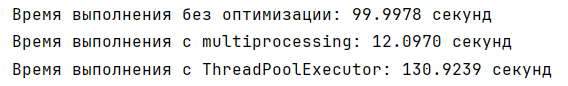

### 2.4.1. Пример №3 (Дополнительный)

Вспомним оптимизацию вычислений используя cupu:

In [22]:
import time
import numpy as np

# Попытка импортировать cupy
try:
    import cupy as cp
    use_cuda = cp.is_available()
except ImportError:
    use_cuda = False

# use_cuda = False

def process_on_cpu(data):
    # Умножение матриц на CPU с использованием numpy
    return np.dot(data, data)

def process_on_gpu(data):
    # Умножение матриц на GPU с использованием cupy
    data_gpu = cp.asarray(data)
    result_gpu = cp.dot(data_gpu, data_gpu)
    return cp.asnumpy(result_gpu)

# Функция для замера времени выполнения
def measure_time(func, data):
    start_time = time.time()
    result = func(data)
    end_time = time.time()
    print(f"Время выполнения {func.__name__}: {end_time - start_time} секунд")
    # return result

# Данные для обработки
data = np.random.rand(1000, 1000)

# Выбор функции обработки в зависимости от доступности CUDA
if use_cuda:
    print("CUDA доступна. Используем GPU для обработки.")
    process_data = process_on_gpu
else:
    print("CUDA не доступна. Используем CPU для обработки.")
    process_data = process_on_cpu

# Замер скорости выполнения
measure_time(process_data, data)

CUDA доступна. Используем GPU для обработки.
Время выполнения process_on_gpu: 0.6074154376983643 секунд


# Практическая часть

Реализуем эффективное программное решение прямой геодезической задачи

- Входные данные:
  - csv-файл с параметрами (Xa, Ya, d, alpha)

- Выходные данные (опционально):
  - csv-файл с вычесленными параметрами (dX, dY, Xb, Yb)
  - xlsx-файл с вычесленными параметрами (dX, dY, Xb, Yb)
  - DataFrame с вычесленными параметрами (dX, dY, Xb, Yb)


## 1. Генератор синтетического набора входных данных

In [23]:
import random
import csv
import numpy as np
from openpyxl import Workbook

def generate_data(filename, num_files=1, num_records_range=(100, 200),
                  Xa_range=(1100, 10000), Ya_range=(1100, 10000),
                  d_range=(1, 1500), alpha_range=(1, 360), save_xlsx=False):

    for i in range(num_files):
        num_records = random.randint(*num_records_range)

        # Создание массивов NumPy
        Xa = np.random.uniform(*Xa_range, size=num_records)
        Ya = np.random.uniform(*Ya_range, size=num_records)
        d = np.random.uniform(*d_range, size=num_records)
        alpha = np.random.uniform(*alpha_range, size=num_records)

        data = np.column_stack((Xa, Ya, d, alpha))

        file_extension = ".csv" # По умолчанию сохраняем в формате CSV
        if save_xlsx:
            file_extension = ".xlsx" # Если указано сохранение в XLSX

        if i > 0:
            full_filename = f"{filename}_{i}{file_extension}" # Добавляем индекс к имени файла
        else:
            full_filename = f"{filename}{file_extension}"

        if save_xlsx:
            wb = Workbook()
            ws = wb.active
            ws.append(["Xa", "Ya", "d", "alpha"])
            ws.append(data)
            wb.save(full_filename)
        else:
            with open(full_filename, 'w', newline='') as csvfile:
                writer = csv.writer(csvfile)
                writer.writerow(["Xa", "Ya", "d", "alpha"])
                writer.writerows(data)

        print(f"Данные сгенерированы и сохранены в {full_filename}")

In [24]:
generate_data("big_data", num_files=1, num_records_range=(10000000, 15000000))
generate_data("my_data", num_files=5, num_records_range=(10000, 15000))

Данные сгенерированы и сохранены в big_data.csv
Данные сгенерированы и сохранены в my_data.csv
Данные сгенерированы и сохранены в my_data_1.csv
Данные сгенерированы и сохранены в my_data_2.csv
Данные сгенерированы и сохранены в my_data_3.csv
Данные сгенерированы и сохранены в my_data_4.csv


## 2. Функция-генератор для последовательного считывания входных данных

In [25]:
import os
import pandas as pd

def process_csv(path, chunk_size=1000):
    """
    Обрабатывает все CSV файлы в папке или один CSV файл и возвращает ограниченный набор данных.

    Args:
        path (str): Путь к папке с CSV файлами или к одному CSV файлу.
        chunk_size (int, optional): Количество возвращаемых строк. По умолчанию 1000.

    Yields:
        pd.DataFrame: Часть данных из каждого CSV файла.
    """
    if os.path.isdir(path):
        # Обрабатываем все CSV файлы в папке
        for filename in os.listdir(path):
            if filename.lower().endswith(".csv"):
                file_path = os.path.join(path, filename)
                first_row = pd.read_csv(file_path, nrows=1, header=None)
                if first_row.applymap(lambda x: isinstance(x, (int, float))).all().all():
                    header_value = None
                else:
                    header_value = 0
                for chunk in pd.read_csv(file_path, chunksize=chunk_size, header=header_value):
                    yield chunk.reset_index(drop=True)
    elif os.path.isfile(path) and path.lower().endswith(".csv"):
        # Обрабатываем один CSV файл
        first_row = pd.read_csv(path, nrows=1, header=None)
        if first_row.applymap(lambda x: isinstance(x, (int, float))).all().all():
            header_value = None
        else:
            header_value = 0
        for chunk in pd.read_csv(path, chunksize=chunk_size, header=header_value):
            yield chunk.reset_index(drop=True)
    else:
        raise ValueError("Недопустимый путь к файлу или папке.")

In [26]:
# Пример использования
path = "my_data_1.csv"
csv_gen = process_csv(path, 100)
# for data_chunk in csv_gen:
#     print(data_chunk.head())
next(csv_gen)

<ipython-input-25-f78c5b0d597c>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if first_row.applymap(lambda x: isinstance(x, (int, float))).all().all():


,Xa,Ya,d,alpha
0,7192.576115,8540.262181,354.796015,256.243462
1,8481.235291,3426.905755,1238.240144,120.297736
2,6347.779776,1966.066380,1109.273997,233.631487
3,9981.484419,5777.884442,601.385619,242.890248
4,6461.029492,7907.970685,1388.053294,235.091706
...,...,...,...,...
95,5406.923026,9737.538112,1015.371006,248.887917
96,2530.426177,4450.536162,1263.055308,91.167598
97,4265.797879,8402.472363,348.112328,331.479743
98,1571.361869,1999.631255,1068.128065,177.874727


## 3. Реализация функции для решения прямой геодезической задачи

### 2.1. Базовая реализация

In [27]:
import math
import pandas as pd

def direct_task(df):
    # Инициализируем списки для хранения результатов
    dX = []
    dY = []
    Xb = []
    Yb = []

    # Итерируем по каждой строке в датафрейме
    for index, row in df.iterrows():
        # Извлекаем значения из строки
        Xa = float(row['Xa'])
        Ya = float(row['Ya'])
        d = float(row['d'])
        alpha = float(row['alpha'])

        # Вычисляем dX и dY с помощью math
        dX.append(d * math.cos(math.radians(alpha)))
        dY.append(d * math.sin(math.radians(alpha)))

        # Вычисляем Xb и Yb
        Xb.append(Xa + dX[-1])
        Yb.append(Ya + dY[-1])

    # Создаем новый датафрейм с результатами
    result_df = pd.DataFrame({
        'dX': dX,
        'dY': dY,
        'Xb': Xb,
        'Yb': Yb
    })

    return result_df

In [28]:
sample_df = pd.DataFrame({
    'Xa': [25.0, 2.0, 3.0],
    'Ya': [140.0, 5.0, 6.0],
    'd': [124.0, 8.0, 9.0],
    'alpha': [46.97, 60.0, 30.0]
})

result = direct_task(sample_df)
print(result)

          dX         dY          Xb          Yb
0  84.615269  90.643567  109.615269  230.643567
1   4.000000   6.928203    6.000000   11.928203
2   7.794229   4.500000   10.794229   10.500000


### 2.2. Оптимальная реализация с векторизацией вычислений

In [29]:
import numpy as np
import pandas as pd

def direct_task(df):
    try:
        # Извлекаем значения из колонок датафрейма
        Xa = df['Xa'].astype(float)
        Ya = df['Ya'].astype(float)
        d = df['d'].astype(float)
        alpha = df['alpha'].astype(float)

        # Вычисляем dX и dY с помощью NumPy
        dX = d * np.cos(np.radians(alpha))
        dY = d * np.sin(np.radians(alpha))

        # Вычисляем Xb и Yb
        Xb = Xa + dX
        Yb = Ya + dY

        # Создаем новый датафрейм с результатами
        result_df = pd.DataFrame({
            'dX': dX,
            'dY': dY,
            'Xb': Xb,
            'Yb': Yb
        })

        return result_df

    except:
        return None


In [30]:
sample_df = pd.DataFrame({
    'Xa': [25.0, 2.0, 3.0],
    'Ya': [140.0, 5.0, 6.0],
    'd': [124.0, 8.0, 9.0],
    'alpha': [46.97, 60.0, 30.0]
})

result = direct_task(sample_df)
print(result)

          dX         dY          Xb          Yb
0  84.615269  90.643567  109.615269  230.643567
1   4.000000   6.928203    6.000000   11.928203
2   7.794229   4.500000   10.794229   10.500000


### 2.3. Оптимальная реализация с векторизацией вычислений и их выполнением на GPU

In [31]:

import pandas as pd
import cupy as cp

def direct_task(df):
    try:
        # Извлекаем значения из колонок датафрейма
        Xa = cp.asarray(df['Xa'].astype(float))
        Ya = cp.asarray(df['Ya'].astype(float))
        d = cp.asarray(df['d'].astype(float))
        alpha = cp.asarray(df['alpha'].astype(float))

        # Вычисляем dX и dY с помощью CuPy
        dX = d * cp.cos(cp.radians(alpha))
        dY = d * cp.sin(cp.radians(alpha))

        # Вычисляем Xb и Yb
        Xb = Xa + dX
        Yb = Ya + dY

        # Создаем новый датафрейм с результатами
        result_df = pd.DataFrame({
            'dX': cp.asnumpy(dX),
            'dY': cp.asnumpy(dY),
            'Xb': cp.asnumpy(Xb),
            'Yb': cp.asnumpy(Yb)
        })

        return result_df

    except:
        return None

In [32]:
sample_df = pd.DataFrame({
    'Xa': [25.0, 2.0, 3.0],
    'Ya': [140.0, 5.0, 6.0],
    'd': [124.0, 8.0, 9.0],
    'alpha': [46.97, 60.0, 30.0]
})

result = direct_task(sample_df)
print(result)

          dX         dY          Xb          Yb
0  84.615269  90.643567  109.615269  230.643567
1   4.000000   6.928203    6.000000   11.928203
2   7.794229   4.500000   10.794229   10.500000


## 4. Многопоточная и многопроцессорная оптимизация. Сравнение и выбор оптимального варианта

In [33]:
import multiprocessing
from concurrent.futures import ThreadPoolExecutor
import pandas as pd
import numpy as np
import time

def parallel_processing(df, num_processes=multiprocessing.cpu_count(), use_multiprocessing=False, proc_fun = direct_task):
    """
    Разделяет датафрейм на фрагменты и обрабатывает их параллельно с помощью ThreadPoolExecutor или multiprocessing.

    Args:
        df (pandas.DataFrame): Исходный датафрейм.
        num_processes (int, optional): Количество процессов/потоков для использования. По умолчанию используется количество ядер CPU.
        use_multiprocessing (bool, optional): True - использовать multiprocessing, False - ThreadPoolExecutor.

    Returns:
        pandas.DataFrame: Объединенный результат обработки фрагментов.
    """

    # Разделяем датафрейм на фрагменты
    df_split = np.array_split(df, num_processes)

    if use_multiprocessing:
        # Multiprocessing
        with multiprocessing.Pool(processes=num_processes) as pool:
            result_list = pool.map(proc_fun, df_split)
    else:
        # ThreadPoolExecutor
        with ThreadPoolExecutor(max_workers=num_processes) as pool:
            result_list = pool.map(proc_fun, df_split)

    # Объединяем результаты
    try:
      final_df = pd.concat([result for result in result_list if result is not None])
    except:
      final_df = result_list
    return final_df


# Пример использования
if __name__ == "__main__":
    # Ваш датафрейм (замените на свой)
    df = pd.read_csv("/content/big_data.csv")

    # Выполнение без multiprocessing
    start_time = time.time()
    result_df_direct = direct_task(df)
    end_time = time.time()
    direct_time = end_time - start_time
    print(f"Время выполнения без multiprocessing: {direct_time:.4f} секунд")

    # Выполнение с multiprocessing
    start_time = time.time()
    result_df_multiprocessing = parallel_processing(df.copy(), use_multiprocessing=True)
    end_time = time.time()
    parallel_time = end_time - start_time
    print(f"Время выполнения с multiprocessing: {parallel_time:.4f} секунд")

    # Выполнение с ThreadPoolExecutor
    start_time = time.time()
    result_df_threadpoolexecutor = parallel_processing(df.copy(), use_multiprocessing=False)
    end_time = time.time()
    threadpoolexecutor_time = end_time - start_time
    print(f"Время выполнения с ThreadPoolExecutor: {threadpoolexecutor_time:.4f} секунд")

Время выполнения без multiprocessing: 0.8131 секунд


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Время выполнения с multiprocessing: 2.9794 секунд
Время выполнения с ThreadPoolExecutor: 2.4488 секунд


## 5. Функция для последовательного экспорта выходных данных

In [34]:
import pandas as pd

def process_and_save_with_function(generator, processing_function=None, output_file='output.csv', save_xlsx=False):
    """
    Обрабатывает данные из генератора с помощью указанной функции и сохраняет результаты в CSV или XLSX файл.

    Args:
        generator: Генератор, возвращающий pd.DataFrame.
        output_file (str): Имя файла для сохранения результатов.
        save_xlsx (bool, optional): Сохранять в формате XLSX (True) или CSV (False). По умолчанию False.
        processing_function (function, optional): Функция для обработки данных из генератора. Должна принимать pd.DataFrame и возвращать pd.DataFrame.
    """
    header_value = None
    first_chunk = next(generator, None)
    if first_chunk is not None:
        if processing_function:
            first_chunk = processing_function(first_chunk)
        if save_xlsx:
            header_value = 0
            wb = pd.ExcelWriter(output_file, engine='openpyxl')
            first_chunk.to_excel(wb, sheet_name='Sheet1', index=False, header=header_value)
        else:
            # Если нет заголовков, заполняем первую строку цифрами
            if first_chunk.columns.empty:
                first_chunk.columns = range(1, len(first_chunk.columns) + 1)
            first_chunk.to_csv(output_file, index=False, header=True)
        for chunk in generator:
            if processing_function:
                chunk = processing_function(chunk)
            if save_xlsx:
                chunk.to_excel(wb, sheet_name='Sheet1', index=False, header=header_value)
            else:
                chunk.to_csv(output_file, mode='a', index=False, header=False)  # Добавляем данные без заголовков
        if save_xlsx:
            wb.save()
        # print(f"Результаты сохранены в файл {output_file}")
    else:
        print("Нет данных для обработки.")

In [35]:
def measure_time(func, args):
    start = time.time()
    func(*args)
    end = time.time()
    return end - start

# Запуск функции с разными методами и измерение времени

path = "big_data.csv"

generator = process_csv(path, 1000000)
processing_function = direct_task
sequential_time = measure_time(process_and_save_with_function, args=(generator, processing_function))

print(f"Время  выполнения: {sequential_time:.10f} секунд")

<ipython-input-25-f78c5b0d597c>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if first_row.applymap(lambda x: isinstance(x, (int, float))).all().all():


Время  выполнения: 101.2453124523 секунд


## Выполним те же действия без использования генераторов:

In [36]:
start_time = time.time()
sample_df = pd.read_csv("big_data.csv")

result = direct_task(sample_df)
result.to_csv("output_file.csv", index=False, header=True)
end_time = time.time()
print(f"Время выполнения: {end_time - start_time} секунд")

# result.head(15)

Время выполнения: 104.05860304832458 секунд


In [37]:
del sample_df
del result

# Комплексное задание №1.

### Ссылка на алгоритм вычисления и пример : https://clck.ru/39aKXC

## **Ход выполнения работы:**

### 1. Напишите функцию для формирования синтетического набора входных данных

Требования к входным данным:

- excel-таблицы или csv-файлы (опционально)
- первая строка содержит заголовки столбцов
- данные в столбцах - значения B (широты) и L (долготы)

Пример:

| B | L |
|---|---|
| 56.4532 | 37.5432 |
| 45.6789 | 12.3456 |
| -34.5678 | 98.7654 |
| 78.9012 | -56.7890 |
| 23.4567 | 89.0123 |
| -12.3456 | 45.6789 |
| 67.8901 | -23.4567 |
| 34.5678 | 78.9012 |
| -98.7654 | 34.5678 |
| 12.3456 | -98.7654 |

**Примечание:**

* Эта таблица содержит 10 случайных значений широты и долготы
* Широта может быть от -90° до 90°
* Долгота может быть от -180° до 180°

In [38]:
import csv
import random
import pandas as pd

def generate_data(num_rows):
    random.seed(42)
    data = []
    for _ in range(num_rows):
        latitude = round(random.uniform(-90, 90), 4)
        longitude = round(random.uniform(-180, 180), 4)
        data.append([latitude, longitude])
    return data

def write_data_to_file(data, filename, file_format='csv'):
    if file_format not in ['csv', 'xlsx']:
        raise ValueError("Invalid file format. Choose 'csv' or 'xlsx'.")

    df = pd.DataFrame(data, columns=["B", "L"])
    df = df.round(4)

    if file_format == 'csv':
        df.to_csv(filename + '.' + file_format, index=False)
    elif file_format == 'xlsx':
        df.to_excel(filename + '.' + file_format, index=False)

def generate_data_to_file(filename, num_rows, file_format='csv'):
    data = generate_data(num_rows)
    write_data_to_file(data, filename, file_format)

generate_data_to_file('syntetic_data_latitude_longitude', 10, 'xlsx')


### 2. Напишите функцию-генератор для последовательного считывания данных из входного файла (csv-файл, excel-таблица)

- Функция принимает на вход путь к файлу и количество строк, которые необходимо возвращать каждую итерацию. Сама функция последовательно возвращает указанное Вами количество строк, до тех пор, пока они не закончатся в этом файле

- Возвращает DataFrame, с указанным количеством строк

In [39]:
import os
import pandas as pd



def read_data_generator(file_path, chunk_size=10):
    def is_numeric_dataframe(df):
      return df.applymap(lambda x: isinstance(x, (int, float))).all().all()

    def determine_header(file_path):
      first_row = pd.read_csv(file_path, nrows=1, header=None)
      if is_numeric_dataframe(first_row):
          return None
      else:
        return 0

    def read_csv_in_chunks(file_path, chunk_size, header_value):
        for chunk in pd.read_csv(file_path, chunksize=chunk_size, header=header_value):
            yield chunk.reset_index(drop=True)

    def read_excel_in_chunks(file_path, chunk_size):
        df = pd.read_excel(file_path)
        num_chunks = len(df) // chunk_size
        if len(df) % chunk_size != 0:
            num_chunks += 1
        for i in range(num_chunks):
            start = i * chunk_size
            end = min((i + 1) * chunk_size, len(df))
            yield df.iloc[start:end].reset_index(drop=True)

    file_extension = file_path.split('.')[-1].lower()

    if file_extension == 'csv':
        header = determine_header(file_path)
        yield from read_csv_in_chunks(file_path, chunk_size, header)
    elif file_extension in ('xls', 'xlsx'):
        yield from read_excel_in_chunks(file_path, chunk_size)
    else:
        raise ValueError("Неправильный путь")

In [40]:
file_path = "syntetic_data_latitude_longitude.xlsx"
batch_size = 10
generator = read_data_generator(file_path, batch_size)
data_output = next(generator)
data_output

,B,L
0,25.0968,-170.9961
1,-40.4947,-99.6441
2,42.5648,63.6118
3,70.5923,-148.7020
4,-14.0541,-169.2730
5,-50.6452,1.9279
6,-85.2235,-108.4184
7,26.9792,16.1789
8,-50.3207,32.1356
9,55.6975,-177.6604


### 3. Напишите оптимальную функцию для реализации алгоритма

- Принимает на вход DataFrame с входными данными
- Возвращает DataFrame с выходными данными (вычесленными параметрами)
- Вычисления должны быть реализованы средствами numpy
- Добавить опционально возможность вычисления на CUDA GPU

In [41]:
import pandas as pd
import numpy as np
from numpy import power, sqrt, sin, cos, tan

def calculate_parameters(a, alpha, B=58.5, L=37.5):

    def round_3(x):
      return round(x, 3)
    def round_9(x):
      return round(x, 9)

    B = np.radians(B)
    L = np.radians(L)

    b = a * (1 - alpha)
    e_squared = alpha * (2 - alpha)
    e1_squared = e_squared / (1 - e_squared)
    c = a ** 2 / b
    b_squared_1 = b ** 2
    b_squared_2 = power(a, 2) * (1 - e_squared)
    b_2 = a ** 2 / c
    e_squared_2 = (a ** 2 - b ** 2) / (a ** 2)
    e1_squared_2 = (a ** 2 - b ** 2) / (b ** 2)
    alpha_2 = (a - b) / a
    alpha_3 = 1 - sqrt(1 - e_squared)
    a_minus_b = a * alpha
    a_times_alpha = a - b
    c_2 = a / (1 - alpha)

    Wi_squared = 1 - e_squared * np.sin(B) ** 2
    Vi_squared = 1 + e1_squared * np.cos(B) ** 2

    aW = b * sqrt(Vi_squared)
    bV = a * sqrt(Wi_squared)
    M = c / power(sqrt(Vi_squared), 3)
    N1 = c / sqrt(Vi_squared)
    N2 = a / sqrt(Wi_squared)
    N3 = a / sqrt(1 - e_squared * np.sin(B) ** 2)
    R_avg = sqrt(M * N1)

    N_div_M = Vi_squared
    tgU = sqrt(1 - e_squared) * tan(B)
    U = np.arctan(tgU)

    x = a * cos(U) * cos(L)
    y = a * cos(U) * sin(L)
    z = b * sin(U)

    x_new = N1 * cos(B) * cos(L)
    y_new = N1 * cos(B) * sin(L)
    z_new = N1* (1 - e_squared) * sin(B)

    return [
        round_3(b),
        round_9(e_squared),
        round_9(e1_squared),
        round_3(c),

        round(b_squared_1, 1),
        round(b_squared_2, 1),

        round_3(b),
        round_3(b_2),

        round_9(e_squared),
        round_9(e_squared_2),

        round_9(e1_squared),
        round_9(e1_squared_2),

        round_9(alpha_2),
        round_9(alpha_3),

        round_3(a_minus_b),
        round_3(a_times_alpha),

        round_3(c),
        round_3(c_2),

        round_9(Wi_squared),
        round_9(Vi_squared),

        round_3(aW),
        round_3(bV),
        round_3(bV),

        round_3(M),

        round_3(N1),
        round_3(N2),
        round_3(N3),

        round_3(R_avg),

        round_9(N_div_M),
        round_9(Vi_squared),

        round_9(tgU),
        round_3(x),
        round_3(y),
        round_3(z),
        round_3(x_new),
        round_3(y_new),
        round_3(z_new)]

def start_process_calculation(data_output, use_gpu=False):
    result_dict = {}
    data = {
      "Эллипсоид Красовского": [6378245, 0.00335233],
      "Эллипсоид WGS-84": [6378137, 0.003352891],
      "Эллипсоид ПЗ-90": [6378136, 0.003352804]
    }
    dafr = pd.DataFrame(data, index=["Полуось 'a'", "Полуось 'α'"])

    for index, row in data_output.iterrows():
        B = row['B']
        L = row['L']

        formulas = {}
        ellipsoids = {}

        for formula, (a, alpha) in dafr.items():
            parameters = calculate_parameters(a, alpha, B, L)

            if use_gpu:
                import cupy as cp
                parameters = [cp.asarray(p) if not isinstance(p, float) else p for p in parameters]

            formulas[formula] = parameters

        result_df = pd.DataFrame(
            formulas,
            index=[
                'b=a(1-α)',
                'е²=α(2-α)',
                '(e¹)²=e²/(1-e²) ',
                'c=a²/b ',

                'b²=a²(1-e²)',
                'b²=a²(1-e²)',

                'b=a²/c',
                'b=a²/c',

                'e²=(a²-b²)/a²',
                'e²=(a²-b²)/a²',

                '(e¹)²=(a²-b²)/b²',
                '(e¹)²=(a²-b²)/b²',

                'α=(a-b)/a=α=1-√1-e²',
                'α=(a-b)/a=α=1-√1-e²',

                'a-b=a*α',
                'a-b=a*α',

                'c=a/(1-α)',
                'c=a/(1-α)',

                'Wi²=(1-e²sin²Bi)',
                'Vi²=(1+(e¹)²cos²Bi)',

                'aW=bV',
                'aW=bV',
                'aW=bV',

                'M=c/V³',

                'N=c / V=a / W=a/√(1-e²sin²B)',
                'N=c / V=a / W=a/√(1-e²sin²B)',
                'N=c / V=a / W=a/√(1-e²sin²B)',

                'Rср.=√MN',

                'N/M=V²',
                'N/M=V²',

                'tgU=√(1-e²)*tgB',
                'x=a*cosUcosL',
                'y=a*cosUsinL',
                'z=b*sinU',

                'x=NcosBcosL',
                'y=NcosBsinL ',
                'z=N(1-e²)sinB'])

        if use_gpu:
            import cupy as cp
            result_df = result_df.applymap(lambda x: cp.asarray(x) if isinstance(x, np.ndarray) else x)
            result_df = result_df.applymap(lambda x: x.get() if hasattr(x, 'get') else x)

        result_dict[index] = result_df

    return result_dict

result = start_process_calculation(data_output)
result[0]


,Эллипсоид Красовского,Эллипсоид WGS-84,Эллипсоид ПЗ-90
b=a(1-α),6.356863e+06,6.356752e+06,6.356751e+06
е²=α(2-α),6.693422e-03,6.694540e-03,6.694367e-03
(e¹)²=e²/(1-e²),6.738526e-03,6.739659e-03,6.739483e-03
c=a²/b,6.399699e+06,6.399594e+06,6.399593e+06
b²=a²(1-e²),4.040971e+13,4.040829e+13,4.040829e+13
b²=a²(1-e²),4.040971e+13,4.040829e+13,4.040829e+13
b=a²/c,6.356863e+06,6.356752e+06,6.356751e+06
b=a²/c,6.356863e+06,6.356752e+06,6.356751e+06
e²=(a²-b²)/a²,6.693422e-03,6.694540e-03,6.694367e-03
e²=(a²-b²)/a²,6.693422e-03,6.694540e-03,6.694367e-03


### 4. Оптимизируйте вычисления, используя Multiprocessing, ThreadPoolExecutor и CuPy

- Сравните их по скорости. Выведите время выполнения с их использованием и без их использования
- Выберите оптимальный вариант оптимизации на CPU

In [42]:
import pandas as pd
import numpy as np
import time
from multiprocessing import get_context
from concurrent.futures import ThreadPoolExecutor
import cupy as cp

def compute_parameters(df, method='default', use_gpu=False):
    numbers_df = df.select_dtypes(include=[np.number])
    if numbers_df.empty:
        raise ValueError("Нет числа")

    data = numbers_df.values
    start_time = time.time()

    if use_gpu:
        data_gpu = cp.asarray(data)
        mean = cp.mean(data_gpu, axis=0).get()
        std = cp.std(data_gpu, axis=0).get()
        total = cp.sum(data_gpu, axis=0).get()

    if not use_gpu:
        if method == 'default':
            mean = np.mean(data, axis=0)
            std = np.std(data, axis=0)
            total = np.sum(data, axis=0)
        elif method == 'multiprocessing':
            with get_context('spawn').Pool() as pool:
                mean_async = pool.apply_async(np.mean, (data,), {'axis': 0})
                std_async = pool.apply_async(np.std, (data,), {'axis': 0})
                total_async = pool.apply_async(np.sum, (data,), {'axis': 0})
                mean = mean_async.get()
                std = std_async.get()
                total = total_async.get()
        elif method == 'threading':
            with ThreadPoolExecutor() as executor:
                futures = [
                    executor.submit(np.mean, data, axis=0),
                    executor.submit(np.std, data, axis=0),
                    executor.submit(np.sum, data, axis=0)
                ]
                mean, std, total = [f.result() for f in futures]
        else:
            raise ValueError("Введите вверный метод")

    elapsed_time = time.time() - start_time

    result = np.vstack([mean, std, total])
    result_df = pd.DataFrame(
        result,
        index=['Mean', 'Std', 'Sum'],
        columns=numbers_df.columns
    )

    return result_df, elapsed_time

def benchmark_methods(df, methods=None, use_gpu=False):
    if methods is None:
        methods = ['default', 'multiprocessing', 'threading']

    results = {}

    # Тестирование CPU методов
    for method in methods:
        try:
            _, elapsed = compute_parameters(df, method=method, use_gpu=False)
            results[f"CPU ({method})"] = elapsed
        except Exception as e:
            results[f"CPU ({method})"] = f"Ошибка: {str(e)}"

    # Тестирование GPU
    if use_gpu:
        try:
            _, elapsed = compute_parameters(df, use_gpu=True)
            results["GPU (CuPy)"] = elapsed
        except Exception as e:
            results["GPU (CuPy)"] = f"Ошибка: {str(e)}"

    max_name_len = max(len(k) for k in results.keys())
    print(f"{'Метод':<{max_name_len}} | Время (с)")

    print("-" * (max_name_len + 12))

    for method, time_taken in results.items():
        print(f"{method:<{max_name_len}} | {time_taken:.4f} с" if isinstance(time_taken, float) else f"{method:<{max_name_len}} | {time_taken}")


df_small = pd.DataFrame(np.random.rand(1000, 10))
df_medium = pd.DataFrame(np.random.rand(10000, 100))
df_large = pd.DataFrame(np.random.rand(100000, 1000))

print("Тест 1 (1000 строк, 10 колонок):")
benchmark_methods(df_small, use_gpu=True)

print("\nТест 2 (10000 строк, 100 колонок):")
benchmark_methods(df_medium, use_gpu=True)

print("\nЭкстремальный тест 3 (100000 строк, 10000 колонок):")
benchmark_methods(df_large, use_gpu=True)


Тест 1 (1000 строк, 10 колонок):
Метод                 | Время (с)
---------------------------------
CPU (default)         | 0.0002 с
CPU (multiprocessing) | 0.3623 с
CPU (threading)       | 0.0008 с
GPU (CuPy)            | 0.0014 с

Тест 2 (10000 строк, 100 колонок):
Метод                 | Время (с)
---------------------------------
CPU (default)         | 0.0051 с
CPU (multiprocessing) | 0.4369 с
CPU (threading)       | 0.0077 с
GPU (CuPy)            | 0.0040 с

Экстремальный тест 3 (100000 строк, 10000 колонок):
Метод                 | Время (с)
---------------------------------
CPU (default)         | 3.9378 с
CPU (multiprocessing) | 11.2606 с
CPU (threading)       | 8.5033 с
GPU (CuPy)            | 0.2398 с


### 5. Напишите функцию для для последовательного экспорта выходных данных в книгу Excel

- На каждую пару входных данных (строку таблицы входных данных) в книге должен формироваться отдельный лист с расчетами по [образцу](https://clck.ru/39aKXC)

In [48]:
import pandas as pd
import numpy as np
import openpyxl
from openpyxl.utils import column_index_from_string
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import Alignment, Font, Border, Side, PatternFill

def create_worksheet(ws, result_dict, index, row, fill_formulas, fill_labels, bold_font, thin_border, thick_border):
    data = {
        'Дано': ['Эллипсоид Красовского', 'Эллипсоид WGS-84', 'Эллипсоид ПЗ-90'],
        'Полуось \'a\'': [6378245, 6378137, 6378136],
        'Полуось \'α\'': [0.00335233, 0.003352891, 0.003352804],
    }
    df = pd.DataFrame(data).transpose()

    for r in dataframe_to_rows(df, index=True, header=False):
        ws.append(r)

    variant_data = [['Номер варианта:', 'Широта B', 'Долгота L'], [index, row['B'], row['L']]]
    for r in variant_data:
        ws.append(r)

    row_index = 0
    for i in range(len(result_dict[index]) + 18):
        if i in [0, 1, 2, 3, 4, 5]:
            continue
        elif i in [6, 27, 34, 44]:
            ws.append(['', '', '', ''])
        elif i in [7, 28, 35, 45]:
            formula_row = ['Формулы', 'Эллипсоид Красовского', 'Эллипсоид WGS-84', 'Эллипсоид ПЗ-90']
            ws.append(formula_row)
            for j in range(len(formula_row)):
                ws.cell(row=i + 1, column=j + 1).font = bold_font
                ws.cell(row=i + 1, column=1).alignment = Alignment(vertical='center', horizontal='center')
        elif i in [12, 31, 41, 50]:
            ws.merge_cells(start_row=i + 1, start_column=1, end_row=i + 1, end_column=len(result_dict[index].columns) + 1)
            ws.cell(row=i + 1, column=1).value = 'Контроль'
            ws.cell(row=i + 1, column=1).font = bold_font
            ws.cell(row=i + 1, column=1).alignment = Alignment(vertical='center', horizontal='center')
        else:
            ws.append([result_dict[index].index[row_index]] + list(result_dict[index].iloc[row_index]))
            ws.cell(row=i+1, column=1).fill = fill_formulas


            row_index += 1

def styles(ws, fill_formulas, fill_labels, bold_font, thin_border, thick_border):
    merge_start = None
    for i in range(1, ws.max_row + 1):
        cell = ws.cell(row=i, column=1)
        if merge_start is None:
            merge_start = i
        elif cell.value != ws.cell(row=merge_start, column=1).value:
            if i - merge_start > 1:
                ws.merge_cells(start_row=merge_start, start_column=1, end_row=i - 1, end_column=1)
                for row in ws[merge_start:i]:
                    for cell in row:
                        cell.alignment = Alignment(vertical='center')
            merge_start = i
    if ws.max_row - merge_start + 1 > 1:
        ws.merge_cells(start_row=merge_start, start_column=1, end_row=ws.max_row, end_column=1)

    for column in ws.columns:
        max_length = 0
        for cell in column:
            if cell.value is not None:
                max_length = max(max_length, len(str(cell.value)))
        column_letter = column[0].column_letter
        ws.column_dimensions[column_letter].width = max_length + 2

    range_list = ['A2:D6', 'A8:D27', 'A29:D34', 'A36:D44', 'A46:D55']
    for diap in range_list:
        cells = ws[diap]

        min_row = cells[0][0].row
        max_row = cells[-1][-1].row
        min_col = cells[0][0].column
        max_col = cells[-1][-1].column

        for cell in cells[0]:
            if cell.column == min_col:
                cell.border = Border(left=thick_border.left, right=thin_border.right, top=thick_border.top, bottom=thin_border.bottom)
            elif cell.column == max_col:
                cell.border = Border(left=thin_border.left, right=thick_border.right, top=thick_border.top, bottom=thin_border.bottom)
            else:
                cell.border = Border(left=thin_border.left, right=thin_border.right, top=thick_border.top, bottom=thin_border.bottom)
        for cell in cells[-1]:
            if cell.column == min_col:
                cell.border = Border(left=thick_border.left, right=thin_border.right, top=thin_border.top, bottom=thick_border.bottom)
            elif cell.column == max_col:
                cell.border = Border(left=thin_border.left, right=thick_border.right, top=thin_border.top, bottom=thick_border.bottom)
            else:
                cell.border = Border(left=thin_border.left, right=thin_border.right, top=thin_border.top, bottom=thick_border.bottom)
        for row in ws.iter_rows(min_row=min_row, max_row=max_row, min_col=min_col, max_col=min_col):
            for cell in row:
                if cell.row == min_row:
                    cell.border = Border(left=thick_border.left, right=thin_border.right, top=thick_border.top, bottom=thin_border.bottom)
                elif cell.row == max_row:
                    cell.border = Border(left=thick_border.left, right=thin_border.right, top=thin_border.top, bottom=thick_border.bottom)
                else:
                    cell.border = Border(left=thick_border.left, right=thin_border.right, top=thin_border.top, bottom=thin_border.bottom)
        for row in ws.iter_rows(min_row=min_row, max_row=max_row, min_col=max_col, max_col=max_col):
            for cell in row:
                if cell.row == min_row:
                    cell.border = Border(left=thin_border.left, right=thick_border.right, top=thick_border.top, bottom=thin_border.bottom)
                elif cell.row == max_row:
                    cell.border = Border(left=thin_border.left, right=thick_border.right, top=thin_border.top, bottom=thick_border.bottom)
                else:
                    cell.border = Border(left=thin_border.left, right=thick_border.right, top=thin_border.top, bottom=thin_border.bottom)
        for row in cells[1:-1]:
            for cell in row[1:-1]:
                cell.border = thin_border

    for i in [1, 4, 5,  7, 12, 28, 31, 35, 41, 45, 50]:
        if i == 1:
            for j in range(1, 5):
                ws.cell(row=i + 1, column=j).fill = fill_labels
                ws.cell(row=i + 1, column=j).alignment = Alignment(vertical='center', horizontal='center')
        elif i in [4, 5]:
            for j in range(1, 4):
                ws.cell(row=i + 1, column=j).fill = fill_formulas
                ws.cell(row=i + 1, column=j).alignment = Alignment(vertical='center', horizontal='center')
        else:
            for j in range(1, 5):
                ws.cell(row=i + 1, column=j).fill = fill_labels

    for row in ws['B14':'D15']:
        for cell in row:
            cell.number_format = '0.00'

def create_final_excel_file(result_dict, sddf, output_file='output.xlsx'):
    wb = openpyxl.Workbook()
    wb.remove(wb['Sheet'])

    sheet_index = 0
    for index, row in sddf.iterrows():
        ws = wb.create_sheet(title=f'Sheet{sheet_index}')
        sheet_index += 1

        fill_formulas = PatternFill(start_color='F4B084', end_color='F4B084', fill_type='solid')
        fill_labels = PatternFill(start_color='E9BFA3', end_color='E9BFA3', fill_type='solid')
        bold_font = Font(bold=True)
        thin_border = Border(left=Side(style='thin'), right=Side(style='thin'), top=Side(style='thin'), bottom=Side(style='thin'))
        thick_border = Border(left=Side(style='medium'), right=Side(style='medium'), top=Side(style='medium'), bottom=Side(style='medium'))

        create_worksheet(ws, result_dict, index, row, fill_formulas, fill_labels, bold_font, thin_border, thick_border)
        styles(ws, fill_formulas, fill_labels, bold_font, thin_border, thick_border)

    wb.save(output_file)

dataframes_dict = start_process_calculation(data_output)
create_final_excel_file(dataframes_dict, data_output, "report.xlsx")


### Выполните вычисления, сравните скорости на большом массиве входных данных

In [44]:
generate_data_to_file('data', 100000, 'xlsx')

file_path = "data.xlsx"

gen = read_data_generator(file_path, 100000)
data = next(gen)





- Выведите первую строку таблицы **входных** данных


In [45]:
data.head(1)

,B,L
0,25.0968,-170.9961


- Выведите содержимое первой страницы таблицы **выходных** данных

In [46]:
start_process_calculation(data)[0]

,Эллипсоид Красовского,Эллипсоид WGS-84,Эллипсоид ПЗ-90
b=a(1-α),6.356863e+06,6.356752e+06,6.356751e+06
е²=α(2-α),6.693422e-03,6.694540e-03,6.694367e-03
(e¹)²=e²/(1-e²),6.738526e-03,6.739659e-03,6.739483e-03
c=a²/b,6.399699e+06,6.399594e+06,6.399593e+06
b²=a²(1-e²),4.040971e+13,4.040829e+13,4.040829e+13
b²=a²(1-e²),4.040971e+13,4.040829e+13,4.040829e+13
b=a²/c,6.356863e+06,6.356752e+06,6.356751e+06
b=a²/c,6.356863e+06,6.356752e+06,6.356751e+06
e²=(a²-b²)/a²,6.693422e-03,6.694540e-03,6.694367e-03
e²=(a²-b²)/a²,6.693422e-03,6.694540e-03,6.694367e-03
